load and prepare datasets from keras


In [1]:
import matplotlib.pyplot as plt
import pandas as pnd
import numpy as np
from tensorflow.keras.datasets import fashion_mnist

%matplotlib inline

import os


/home/ddddiiiirrrr4/anaconda3/envs/codes7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ddddiiiirrrr4/anaconda3/envs/codes7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ddddiiiirrrr4/anaconda3/envs/codes7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ddddiiiirrrr4/anaco

In [2]:
# load dataset to Variable in RAM, don't write to disk
(image_train, label_train), (image_test, label_test) = fashion_mnist.load_data()

In [3]:
def draw_digit(digit):
    plt.figure(figsize=(10,1))
    label_train_index_0 = []
    for label_train_index in range(500):
        if label_train[label_train_index] == digit:
            label_train_index_0 = label_train_index_0 + [label_train_index]
        if len(label_train_index_0) == 10:
            break
    for label_train_index_0_index in range(len(label_train_index_0)):
        plt.subplot(1, len(label_train_index_0), label_train_index_0_index+1)
        plt.imshow(image_train[label_train_index_0[label_train_index_0_index]], cmap='gray')
        plt.axis("off")
    print(label_train_index_0)
    plt.show()


[1, 2, 4, 10, 17, 26, 34, 48, 61, 64]


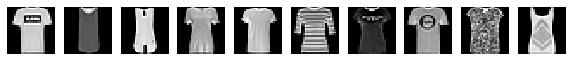

[16, 21, 38, 69, 71, 74, 78, 80, 86, 97]


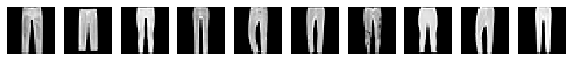

[5, 7, 27, 37, 45, 53, 54, 65, 92, 123]


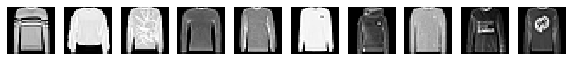

[3, 20, 25, 31, 47, 49, 50, 51, 58, 59]


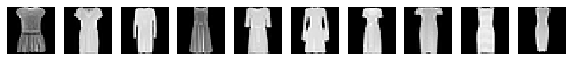

[19, 22, 24, 28, 29, 68, 75, 76, 96, 117]


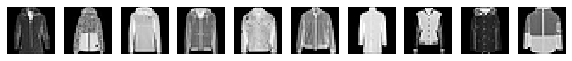

[8, 9, 12, 13, 30, 36, 43, 60, 62, 63]


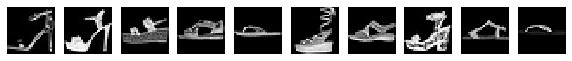

[18, 32, 33, 39, 40, 55, 56, 72, 77, 95]


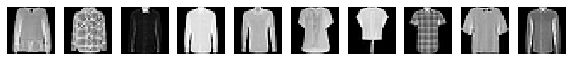

[6, 14, 41, 46, 52, 83, 85, 87, 108, 119]


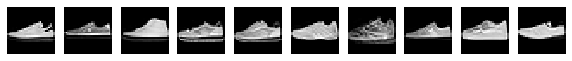

[23, 35, 57, 99, 100, 105, 109, 110, 130, 144]


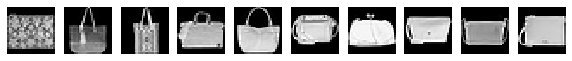

[0, 11, 15, 42, 44, 79, 84, 88, 89, 90]


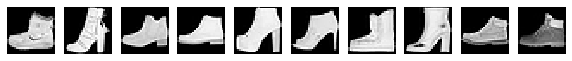

In [4]:
for digit in range(10):
    draw_digit(digit)

In [5]:
from tensorflow.keras.models import Sequential
# list of layers

In [6]:
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical



In [7]:
batch_size, img_rows, img_cols = 64, 28, 28
image_train = image_train.reshape(image_train.shape[0], img_rows, img_cols, 1)
image_test = image_test.reshape(image_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

In [8]:
image_train = image_train.astype("float32")
image_test = image_test.astype("float32")
image_train /= 255
image_test /= 255 

In [9]:
label_train = to_categorical(label_train, 10)
label_test = to_categorical(label_test, 10)

model = Sequential()

model.add(Convolution2D(32, 4, 4, padding="same", input_shape=input_shape))
model.add(Activation("elu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding="same"))
model.add(Convolution2D(64, 6, 6, padding="same", input_shape=input_shape))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding="same"))


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [10]:
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation("softmax"))


In [11]:
model.compile(loss="categorical_crossentropy",
optimizer="adam", metrics=["accuracy"])
model.fit(image_train, label_train, batch_size=batch_size, epochs=20, 
          verbose=1, 
          validation_data=(image_test, label_test))
score = model.evaluate(image_test, label_test, verbose=0)
print("Test score: %f" % score[0])
print("Test accuracy: %f" % score[1])



Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 114us/sample - loss: 0.5906 - acc: 0.7813 - val_loss: 0.4566 - val_acc: 0.8330
Epoch 2/20
60000/60000 [==============================] - 4s 62us/sample - loss: 0.3932 - acc: 0.8556 - val_loss: 0.3800 - val_acc: 0.8590
Epoch 3/20
60000/60000 [==============================] - 4s 64us/sample - loss: 0.3457 - acc: 0.8713 - val_loss: 0.3558 - val_acc: 0.8679
Epoch 4/20
60000/60000 [==============================] - 4s 63us/sample - loss: 0.3181 - acc: 0.8837 - val_loss: 0.3493 - val_acc: 0.8762
Epoch 5/20
60000/60000 [==============================] - 4s 60us/sample - loss: 0.3002 - acc: 0.8875 - val_loss: 0.3374 - val_acc: 0.8736
Epoch 6/20
60000/60000 [==============================] - 4s 66us/sample - loss: 0.2825 - acc: 0.8930 - val_loss: 0.3252 - val_acc: 0.8832
Epoch 7/20
60000/60000 [==============================] - 4s 59us/sample - loss: 0.2691 - acc: 0.8986 - val_loss: 0